In [5]:
import torch
import matplotlib.pyplot as plt
from common import *
import time
import copy
import gym

import numpy as np

import os
import matplotlib
import pickle
from stable_baselines3 import PPO as ALGO
from stable_baselines3.common.vec_env import VecNormalize
from stable_baselines3.common.results_plotter import load_results

import pandas as pd

from common import mesh_dim

In [15]:
matplotlib.style.use('default')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

save_dir = "./data_ppo_iden2"
env_names = list(os.walk(save_dir))[0][1]

agent_dict = {}
df_dict = {}
env_dict = {}

for env_name in env_names:
    agent_list = []
    df_list = []
    env_list = []

    
    
  
    for agent_name in os.listdir(f"{save_dir}/{env_name}"):
        
        
        df = load_results(f"{save_dir}/{env_name}/{agent_name}")
        #df_list.append(df)
        
        plt.plot(df['r'])
            
        agent_list.append(ALGO.load(f"{save_dir}/{env_name}/{agent_name}/model.zip"))  
        env_list.append(pickle.load(open(f"{save_dir}/{env_name}/{agent_name}/env.zip",'rb')))
    
    plt.title(env_name)
    plt.figure()
    agent_dict[env_name] = agent_list
    df_dict[env_name] = df_list
    env_dict[env_name] = env_list

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 9


In [52]:
def do_rollout_stable(env, model, env_steps=1000,render=False):
    #model.observation_space = env.observation_space
    obs = env.reset()
    
    acts_list = []
    obs1_list = []
    rews_list = []
    done_list = []

    act_size = env.action_space.shape[0]
    obs_size = env.observation_space.shape[0]

    done = False
    cur_step = 0

#    import ipdb; ipdb.set_trace()

    while cur_step < env_steps:
        acts = model.predict(obs)[0]

        obs, rew, done, out = env.step(acts)

        if render:
            env.render()
            time.sleep(.002)
        obs1_list.append(obs)

        acts_list.append(acts)
        rews_list.append(rew)
        done_list.append(done)
        cur_step += 1

    ep_obs1 = np.array(obs1_list)
    ep_acts = np.stack(acts_list)
    ep_rews = np.stack(rews_list)

    return ep_obs1, ep_acts, ep_rews


In [61]:
model = agent_dict['Hopper-v2'][1]
env = gym.make(env_names[0])


3617.3266525718027


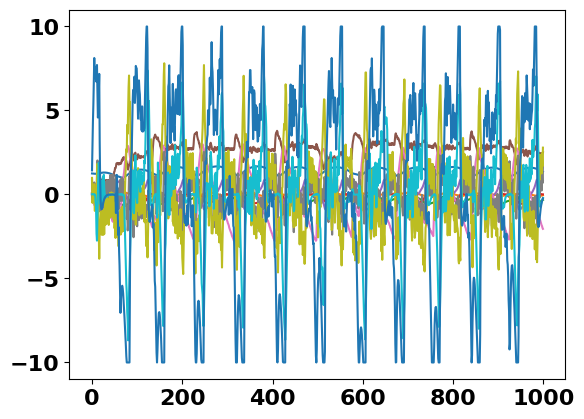

In [62]:
obs,acts,rews = do_rollout_stable(env, model)
print(sum(rews))
plt.plot(obs)

In [63]:
lower,upper,mesh_size, deltas = mesh_dim(obs)
print(lower)
print(upper)

2.124096829262517
2.440192699489142


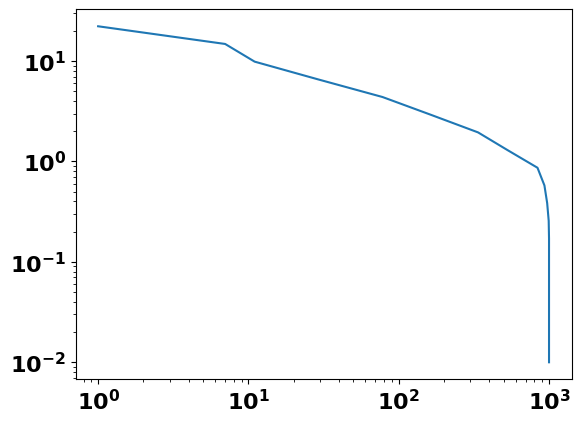

In [64]:
plt.loglog(mesh_size,deltas)

m